In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.sample(5)

,Survived,Age,Fare
258,1,35.0,512.3292
567,0,29.0,21.0750
741,0,36.0,78.8500
712,1,48.0,52.0000
14,0,14.0,7.8542


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [25]:
X=df.iloc[:,1:3]
Y=df.iloc[:,0]

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

C:\Users\kgaje\AppData\Local\Temp\ipykernel_2336\2888751792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


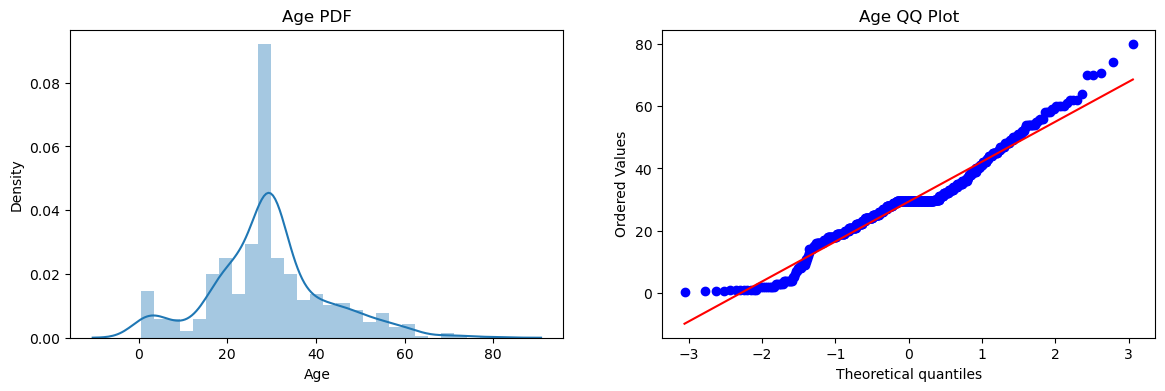

In [41]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\kgaje\AppData\Local\Temp\ipykernel_2336\2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


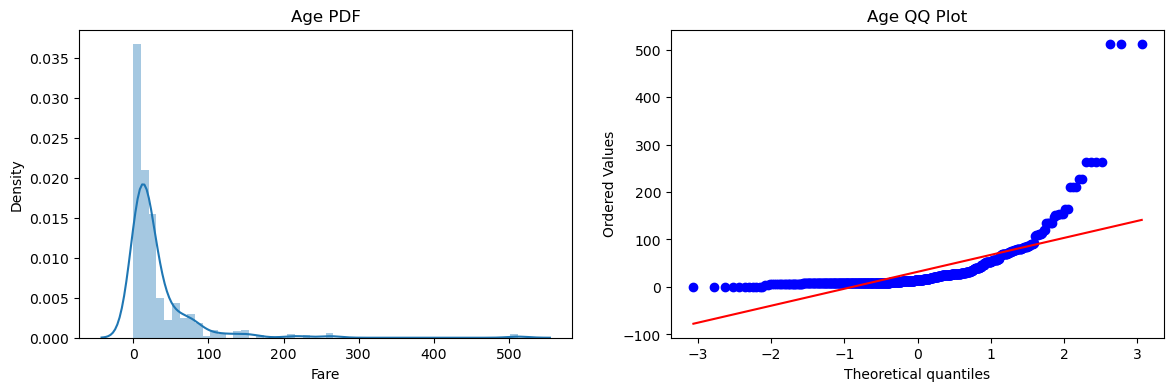

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [43]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [44]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(Y_test,y_pred))
print("Accuracy DT",accuracy_score(Y_test,y_pred1))

Accuracy LR 0.6529850746268657
Accuracy DT 0.6753731343283582


In [45]:
trf = FunctionTransformer(func=np.log1p)

In [46]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [48]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(Y_test,y_pred))
print("Accuracy DT",accuracy_score(Y_test,y_pred1))

Accuracy LR 0.6791044776119403
Accuracy DT 0.6753731343283582


In [50]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,Y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6611111111111112


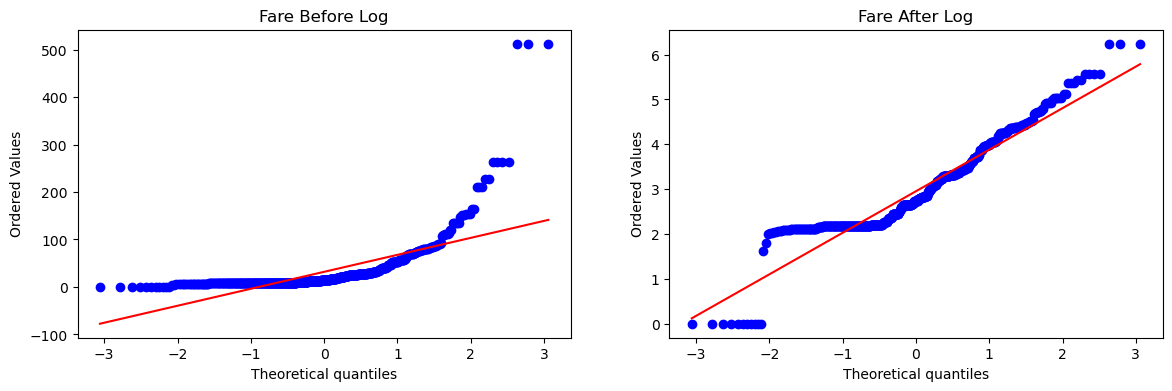

In [51]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

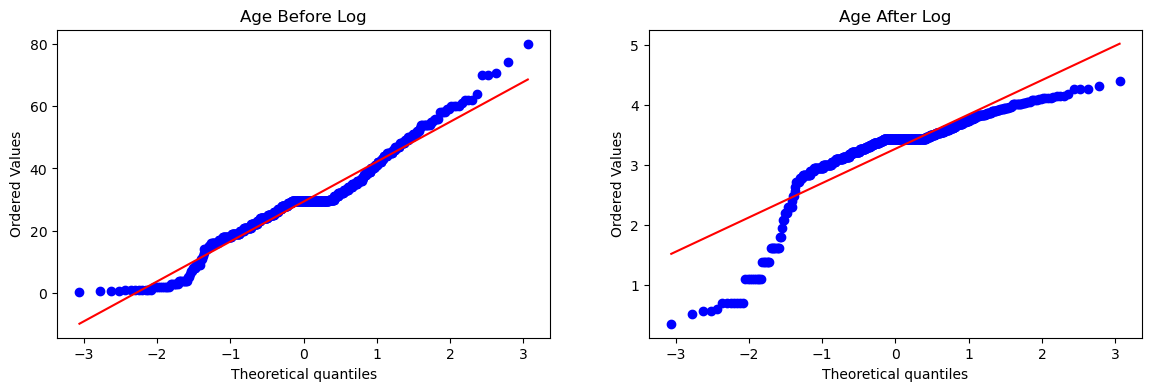

In [52]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()


In [53]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [54]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,Y_train)
clf2.fit(X_train_transformed2,Y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(Y_test,y_pred))
print("Accuracy DT",accuracy_score(Y_test,y_pred2))

Accuracy LR 0.664179104477612
Accuracy DT 0.6716417910447762


In [56]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,Y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577153558052434


In [57]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


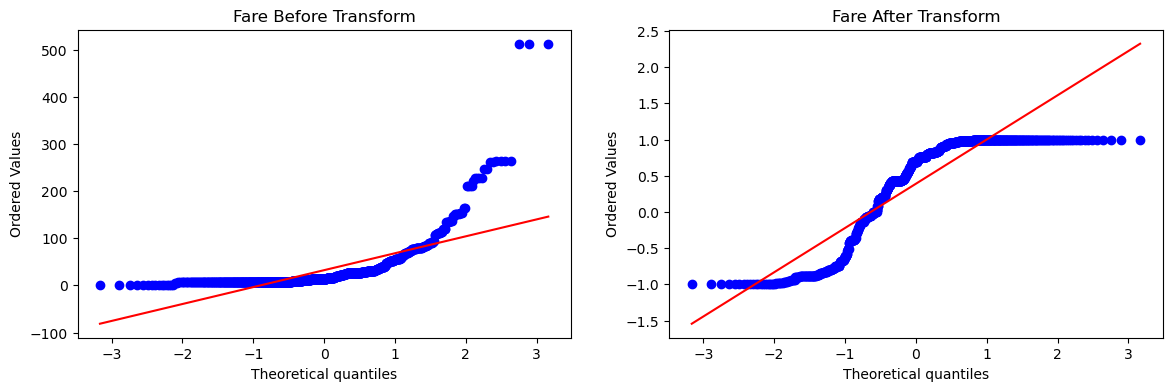

In [58]:

apply_transform(np.sin)

Accuracy 0.6611485642946316


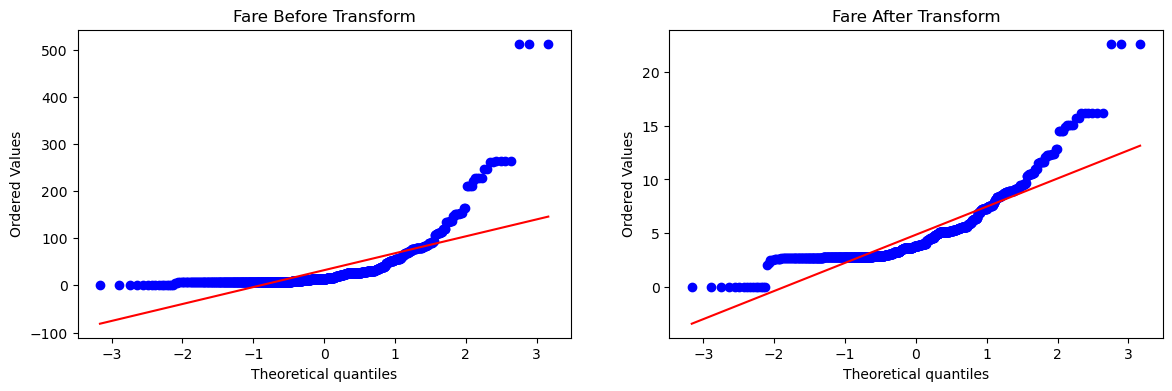

In [59]:
apply_transform(np.sqrt)

Accuracy 0.6712609238451936


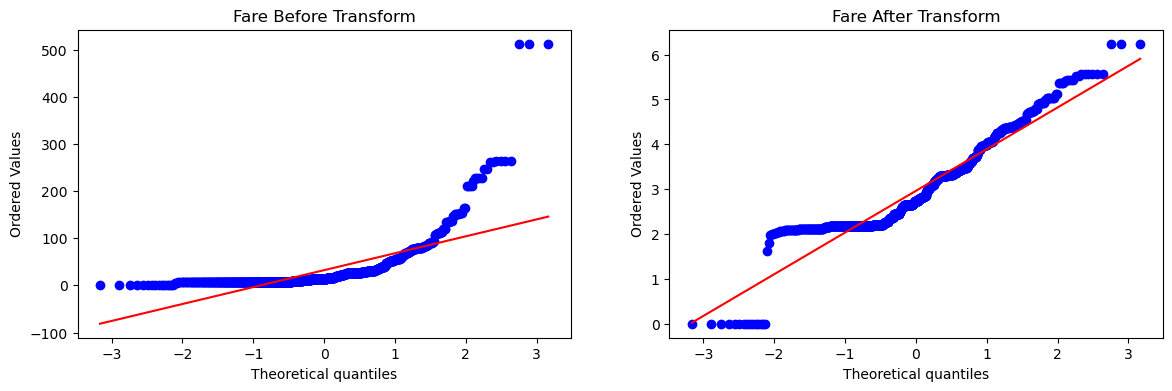

In [60]:
apply_transform(np.log1p)